In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#reading the data
dataset = pd.read_excel("Expander_data.xlsx")

In [3]:
#getting the information regarding dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296450 entries, 0 to 296449
Data columns (total 9 columns):
Timestamp                     296450 non-null datetime64[ns]
Suction Pressure (psig)       296450 non-null float64
Suction Temperature (F)       296450 non-null float64
Total Flow (gpm)              296450 non-null float64
Speed (rpm)                   296450 non-null float64
By-pass Valve Position (%)    296450 non-null float64
Discharge Pressure (psig)     296450 non-null float64
Discharge Temperature (F)     296450 non-null float64
Run Status                    0 non-null float64
dtypes: datetime64[ns](1), float64(8)
memory usage: 20.4 MB


In [4]:
#Checking the null values
dataset.isnull().sum()

Timestamp                          0
Suction Pressure (psig)            0
Suction Temperature (F)            0
Total Flow (gpm)                   0
Speed (rpm)                        0
By-pass Valve Position (%)         0
Discharge Pressure (psig)          0
Discharge Temperature (F)          0
Run Status                    296450
dtype: int64

In [5]:
#preview of data
dataset.head()

,Timestamp,Suction Pressure (psig),Suction Temperature (F),Total Flow (gpm),Speed (rpm),By-pass Valve Position (%),Discharge Pressure (psig),Discharge Temperature (F),Run Status
0,2020-01-04 21:20:00,596.100853,-229.436683,7925.800487,2999.411045,6.0,226.044931,-227.614448,NaN
1,2020-01-04 21:20:00,596.838217,-230.453708,8085.917724,2989.706617,6.0,217.150974,-228.668636,NaN
2,2020-01-04 21:20:00,596.468895,-229.545356,7902.175243,3006.331679,6.0,226.054086,-227.755324,NaN
3,2020-01-04 21:20:00,603.568271,-230.309438,7991.808959,3010.487486,6.0,226.016182,-228.489113,NaN
4,2020-01-04 21:21:00,595.407372,-229.767969,7871.560747,2986.665518,6.0,227.769383,-227.971795,NaN


In [6]:
#drop "Run Status" column as it contains null values only
dataset=dataset.drop("Run Status", axis=1)
dataset.head()

,Timestamp,Suction Pressure (psig),Suction Temperature (F),Total Flow (gpm),Speed (rpm),By-pass Valve Position (%),Discharge Pressure (psig),Discharge Temperature (F)
0,2020-01-04 21:20:00,596.100853,-229.436683,7925.800487,2999.411045,6.0,226.044931,-227.614448
1,2020-01-04 21:20:00,596.838217,-230.453708,8085.917724,2989.706617,6.0,217.150974,-228.668636
2,2020-01-04 21:20:00,596.468895,-229.545356,7902.175243,3006.331679,6.0,226.054086,-227.755324
3,2020-01-04 21:20:00,603.568271,-230.309438,7991.808959,3010.487486,6.0,226.016182,-228.489113
4,2020-01-04 21:21:00,595.407372,-229.767969,7871.560747,2986.665518,6.0,227.769383,-227.971795


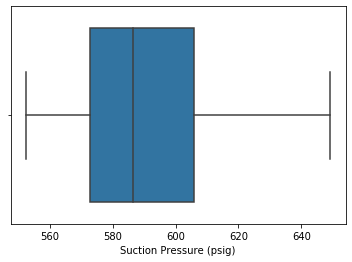

In [7]:
#Outlier detection
sns.boxplot(dataset["Suction Pressure (psig)"])

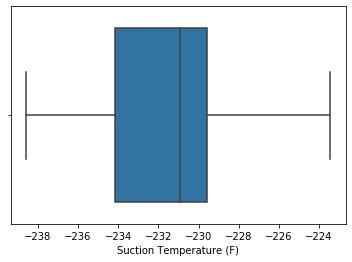

In [8]:
sns.boxplot(dataset["Suction Temperature (F)"])

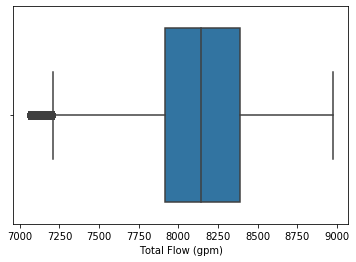

In [9]:
sns.boxplot(dataset["Total Flow (gpm)"])

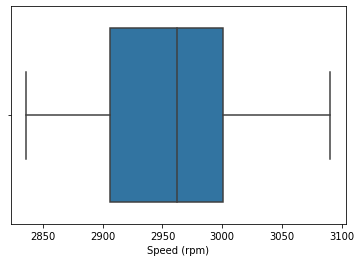

In [10]:
sns.boxplot(dataset["Speed (rpm)"])

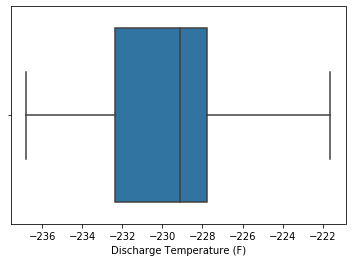

In [11]:
sns.boxplot(dataset["Discharge Temperature (F)"])

In [12]:
#Separating Date and time from "Timestamp" column
dataset['Dates'] = pd.to_datetime(dataset['Timestamp']).dt.date
dataset['Time'] = pd.to_datetime(dataset['Timestamp']).dt.time

In [13]:
#Remove "Timestamp" column
dataset=dataset.drop("Timestamp", axis=1)
dataset.head(3)

,Suction Pressure (psig),Suction Temperature (F),Total Flow (gpm),Speed (rpm),By-pass Valve Position (%),Discharge Pressure (psig),Discharge Temperature (F),Dates,Time
0,596.100853,-229.436683,7925.800487,2999.411045,6.0,226.044931,-227.614448,2020-01-04,21:20:00
1,596.838217,-230.453708,8085.917724,2989.706617,6.0,217.150974,-228.668636,2020-01-04,21:20:00
2,596.468895,-229.545356,7902.175243,3006.331679,6.0,226.054086,-227.755324,2020-01-04,21:20:00


In [14]:
#Segragating month and year from "Dates" columns
dataset['Month'] = pd.to_datetime(dataset['Dates']).dt.month
dataset['Year'] = pd.to_datetime(dataset['Dates']).dt.year

In [15]:
dataset.sort_values(by=['Dates'], inplace=True, ascending=True)
dataset.head(3)

,Suction Pressure (psig),Suction Temperature (F),Total Flow (gpm),Speed (rpm),By-pass Valve Position (%),Discharge Pressure (psig),Discharge Temperature (F),Dates,Time,Month,Year
0,596.100853,-229.436683,7925.800487,2999.411045,6.0,226.044931,-227.614448,2020-01-04,21:20:00,1,2020
422,605.566736,-229.921436,7845.450867,3009.958982,6.0,235.893883,-228.125504,2020-01-04,23:05:00,1,2020
423,598.386355,-230.181849,8021.995444,3004.729759,6.0,220.518016,-228.399318,2020-01-04,23:05:00,1,2020


In [16]:
#checking the unique values in "Month"
dataset['Month'].unique()

array([1, 2, 3, 4], dtype=int64)

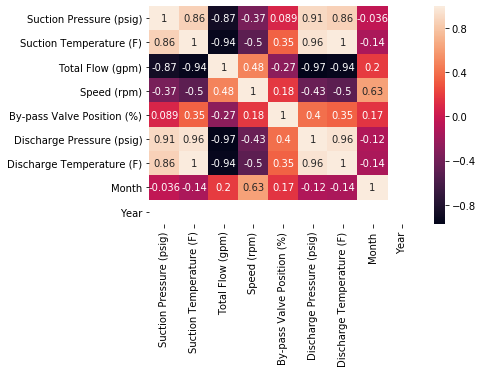

In [24]:
#Identifying the correlation amongst features
sns.heatmap(dataset.corr(), annot=True)

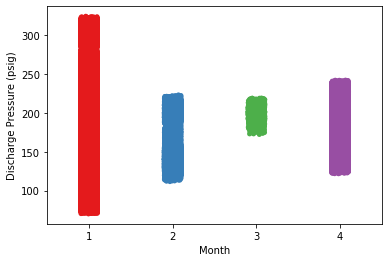

In [22]:
#Variation in Discharge Pressure (psig)" on Monthly basis
sns.stripplot(x="Month", y="Discharge Pressure (psig)", data=dataset,jitter=True,palette='Set1')

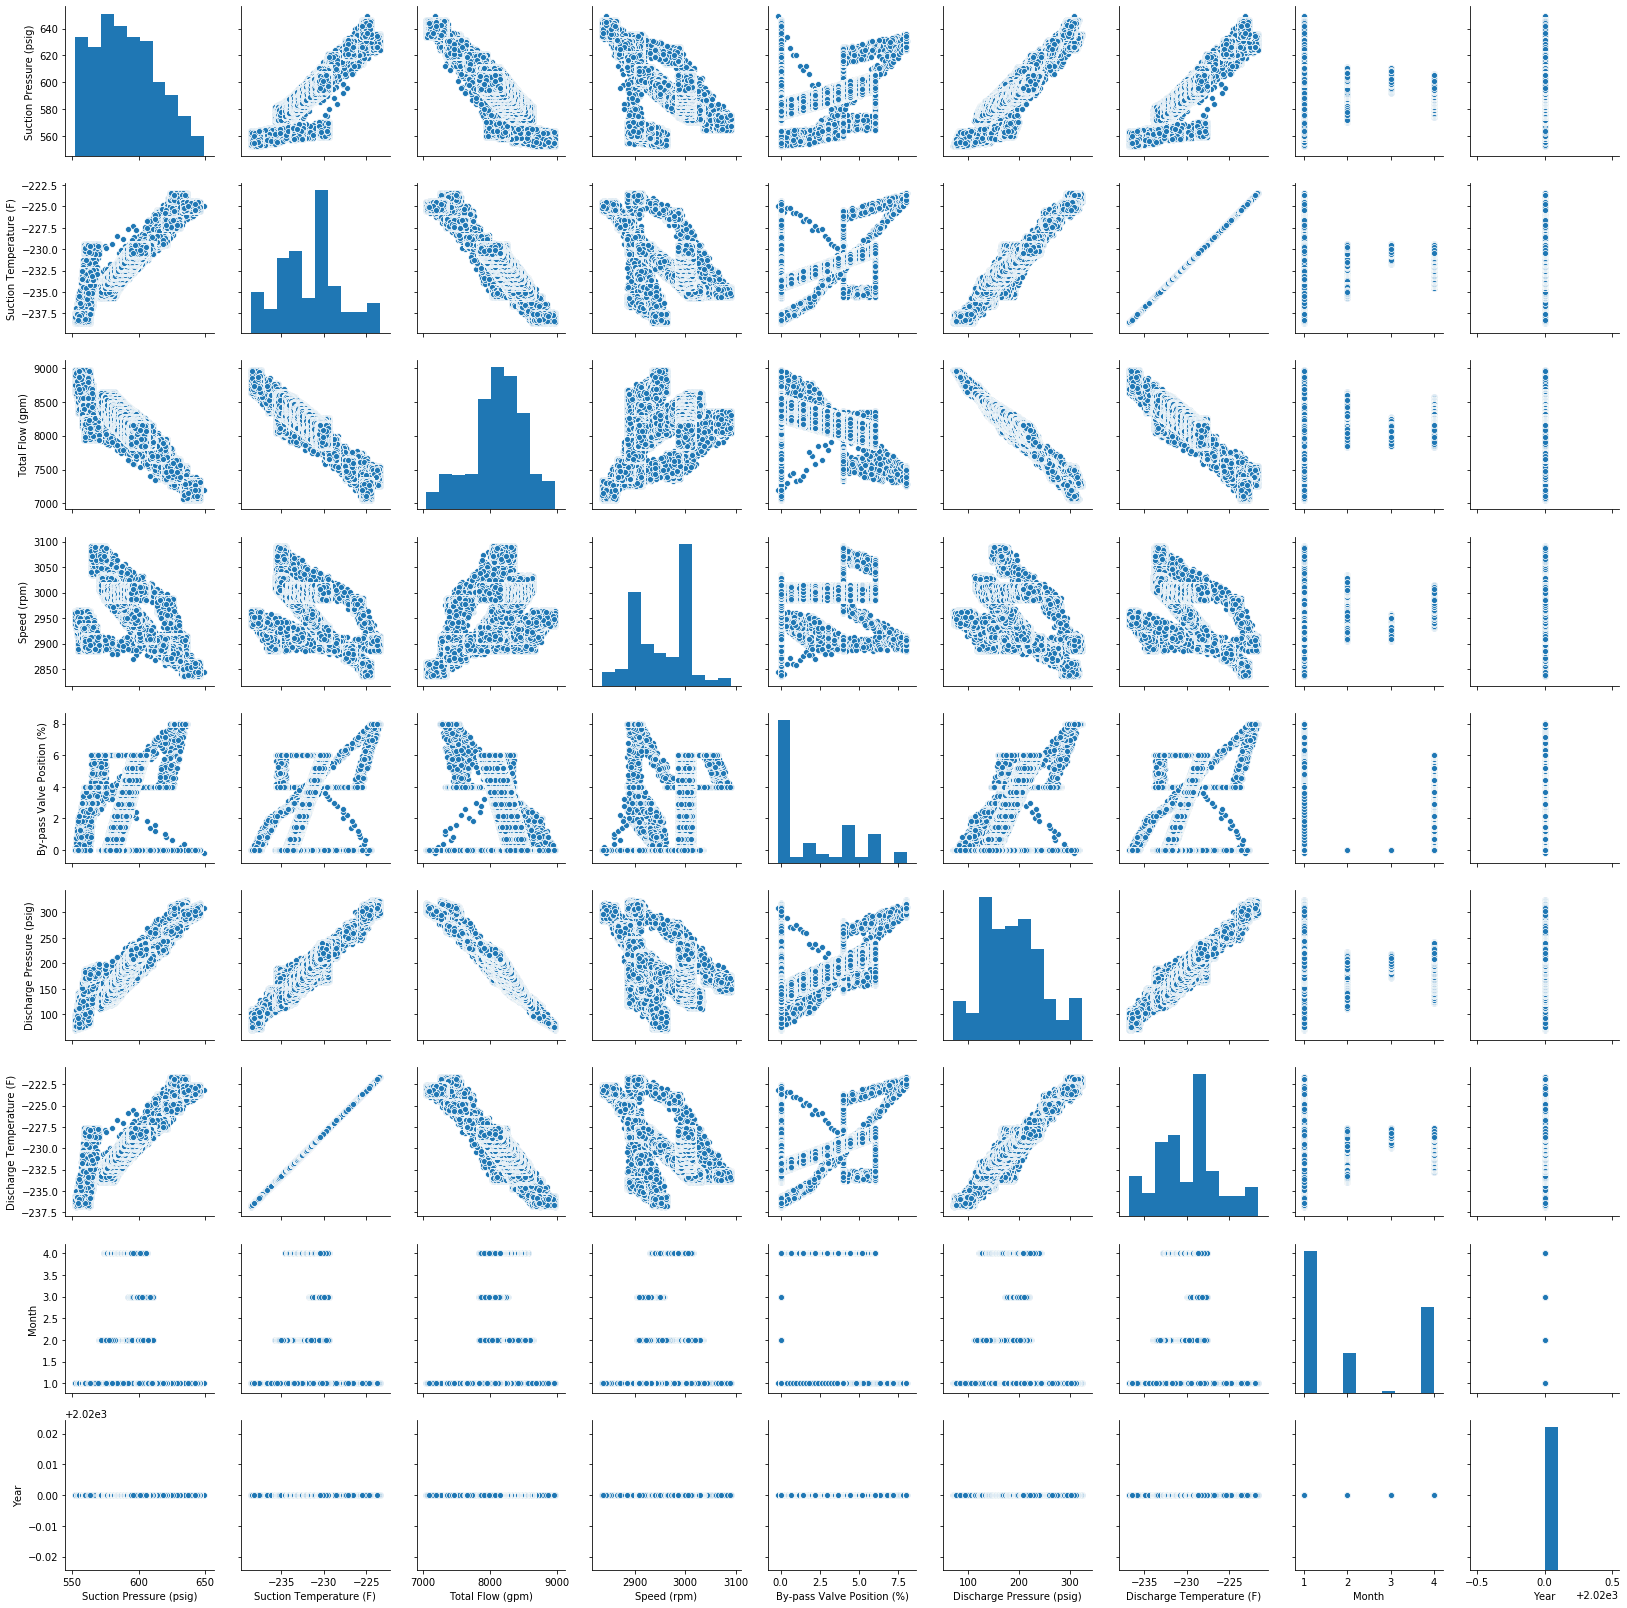

In [26]:
#Visualize the correlation amongst the features
sns.pairplot(dataset)

C:\Users\DELL-\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Discharge Pressure (psig)')

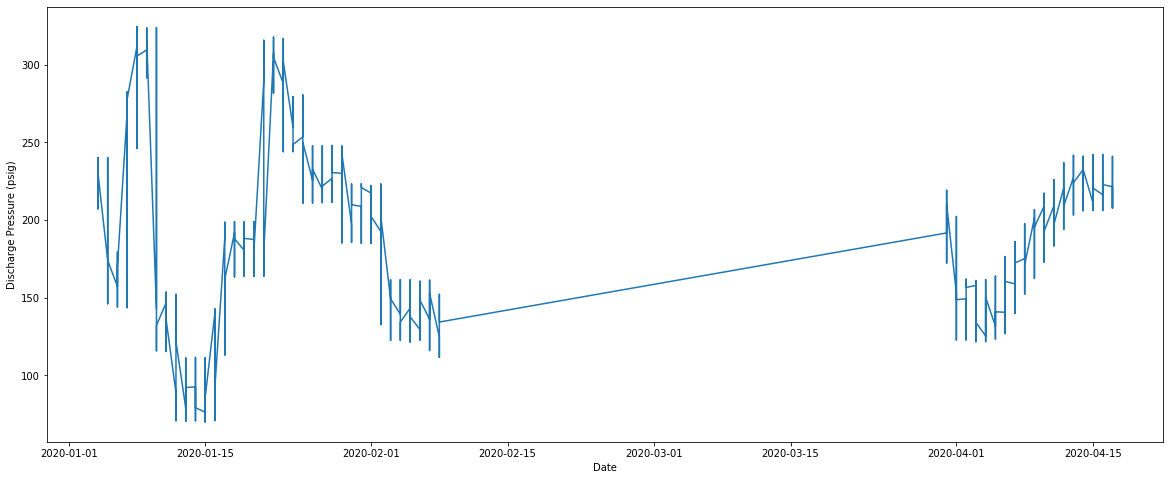

In [27]:
plt.figure(figsize=(20,8))
plt.plot('Dates','Discharge Pressure (psig)',data=dataset)
plt.xlabel('Date')
plt.ylabel('Discharge Pressure (psig)')

In [28]:
#Linear Regression

#Feature selection
X = dataset.iloc[:,[0,1,2,3,6]].values #Feature Matrix
y= dataset.iloc[:,5].values #Vector of prediction

In [29]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()

In [30]:
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
lin_reg.score(X,y)

0.9748449433690588

In [37]:
y_pred =lin_reg.predict(X)
y_pred

array([218.26365425, 225.7767182 , 208.03388071, ..., 208.13094727,
       205.48225584, 195.63436401])

In [39]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y, y_pred))

8.914321297906454